In [30]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [31]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

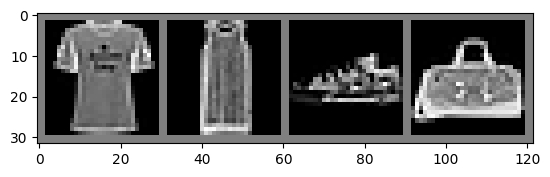

Labels: T-shirt/top | Dress | Sneaker | Bag


In [32]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))
print('Labels:', ' | '.join(classes[labels[j]] for j in range(4)))

In [33]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [1,28,28] → [32,13,13]
        x = self.pool(F.relu(self.conv2(x)))  # [32,13,13] → [64,5,5]
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [34]:
model = FashionCNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [35]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    loop = tqdm(trainloader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=True)

    for images, labels in loop:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        loop.set_postfix(loss=running_loss / len(trainloader))


Epoch [10/10]: 100%|██████████| 938/938 [00:27<00:00, 34.32it/s, loss=0.11]  


In [36]:
correct = 0
total = 0

with torch.no_grad():  # Disable gradient utk evaluasi
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Akurasi pada data test: {100 * correct / total:.2f}%')

Akurasi pada data test: 91.34%


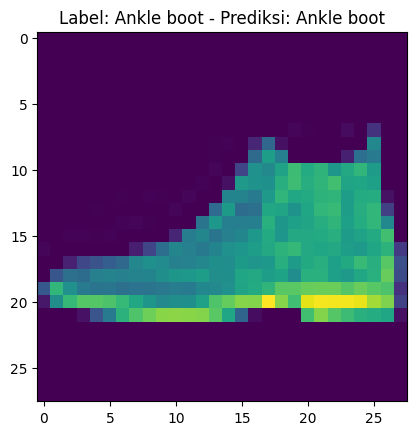

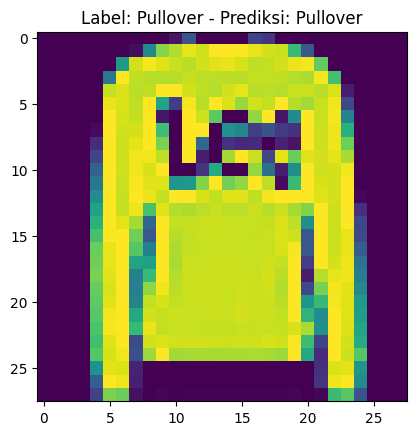

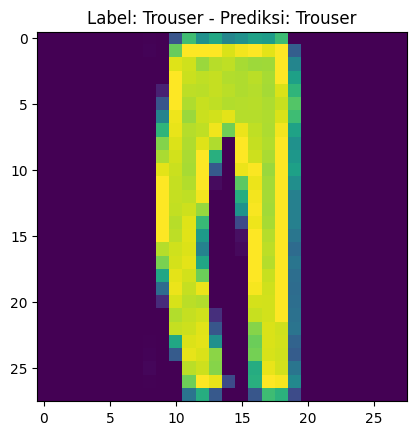

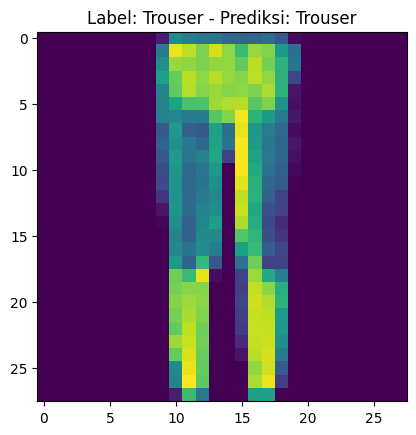

In [37]:
# Tampilkan 4 gambar dari test set dengan prediksinya
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Unnormalize & tampilkan
images = images[:4]
labels = labels[:4]
preds = preds[:4]

def imshow(img, title):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.title(title)
    plt.show()

for i in range(4):
    imshow(images[i], title=f"Label: {classes[labels[i]]} - Prediksi: {classes[preds[i]]}")